In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/code/detectron2

/content/drive/My Drive/code/detectron2


In [ ]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:36tcmalloc: large alloc 1147494400 bytes == 0x564ab5328000 @  0x7fc70e1ff615 0x564a4f1e64cc 0x564a4f2c647a 0x564a4f1e92ed 0x564a4f2dae1d 0x564a4f25ce99 0x564a4f2579ee 0x564a4f1eabda 0x564a4f25cd00 0x564a4f2579ee 0x564a4f1eabda 0x564a4f259737 0x564a4f2dbc66 0x564a4f258daf 0x564a4f2dbc66 0x564a4f258daf 0x564a4f2dbc66 0x564a4f258daf 0x564a4f1eb039 0x564a4f22e409 0x564a4f1e9c52 0x564a4f25cc25 0x564a4f2579ee 0x564a4f1eabda 0x564a4f259737 0x564a4f2579ee 0x564a4f1eabda 0x564a4f258915 0x564a4f1eaafa 0x564a4f258c0d 0x564a4f2579ee
     |████████████████████████████████| 881.9 MB 16 kB/s 
     |████████████████████████████████| 23.3 MB 1.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvisio

'1.10.1+cu102'

In [ ]:
%cd /content/drive/MyDrive/code/detectron2
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2_repo

/content/drive/MyDrive/code/detectron2
fatal: destination path 'detectron2' already exists and is not an empty directory.
ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content/drive/MyDrive/code/detectron2/detectron2_repo


In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

     |████████████████████████████████| 274 kB 5.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=187c9a8d6eb75b0cc4a45a404427704c4dfda9ca29f932b5dbd2e16e1ccf4551
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
torch:  1.10 ; cuda:  cu102
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.10/index.html
     |████████████████████████████████| 6.5 MB 885 kB/s 
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 145 kB 11.4 MB/s 
     |████████████████████████████████| 130 kB 43.8 MB/s 
     |████████████████████████████████| 749 kB 32.8 MB/s 
     |████████████████████████████████| 843 kB 37.1 MB/s 
     |████████████████████████████████

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
%cd /content/drive/My Drive/code/detectron2
!mkdir data
%cd data
!mkdir images
%cd ..
!pwd    

/content/drive/My Drive/code/detectron2
/content/drive/My Drive/code/detectron2/data
/content/drive/My Drive/code/detectron2
/content/drive/My Drive/code/detectron2


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("road", {}, "./data/trainval.json", "./data/images")
person_metadata = MetadataCatalog.get("road")
dataset_dicts = DatasetCatalog.get("road")

WARNING [12/23 07:12:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/23 07:12:52 d2.data.datasets.coco]: Loaded 100 images in COCO format from ./data/trainval.json


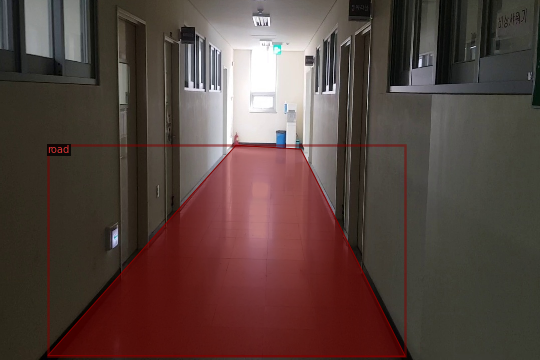

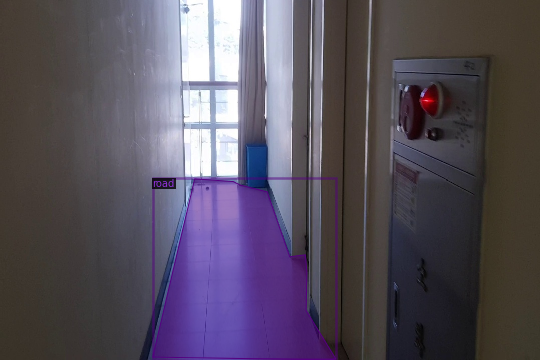

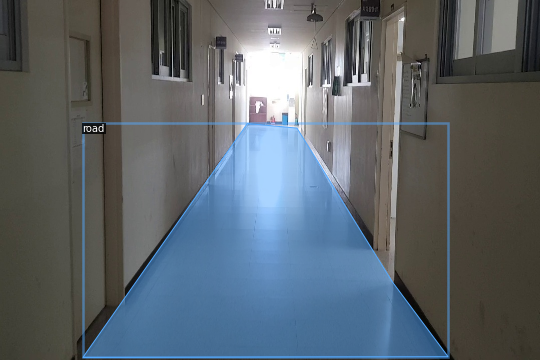

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):

    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=person_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("road",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 1 classes (person)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[12/23 07:28:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in

[12/23 07:28:43 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[12/23 07:29:10 d2.utils.events]:  eta: 0:06:14  iter: 19  total_loss: 1.274  loss_cls: 0.2991  loss_box_reg: 0.24  loss_mask: 0.6755  loss_rpn_cls: 0.02826  loss_rpn_loc: 0.01008  time: 1.3257  data_time: 0.0207  lr: 0.0012854  max_mem: 4370M
[12/23 07:29:36 d2.utils.events]:  eta: 0:05:56  iter: 39  total_loss: 0.7739  loss_cls: 0.1114  loss_box_reg: 0.3618  loss_mask: 0.2191  loss_rpn_cls: 0.007641  loss_rpn_loc: 0.00813  time: 1.3334  data_time: 0.0088  lr: 0.0026174  max_mem: 4370M
[12/23 07:30:04 d2.utils.events]:  eta: 0:05:29  iter: 59  total_loss: 0.5112  loss_cls: 0.06706  loss_box_reg: 0.2781  loss_mask: 0.1587  loss_rpn_cls: 0.002277  loss_rpn_loc: 0.007796  time: 1.3437  data_time: 0.0096  lr: 0.0039494  max_mem: 4370M
[12/23 07:30:31 d2.utils.events]:  eta: 0:05:01  iter: 79  total_loss: 0.4403  loss_cls: 0.05891  loss_box_reg: 0.2189  loss_mask: 0.1218  loss_rpn_cls: 0.005249  loss_rpn_loc: 0.00764  time: 1.3540  data_time: 0.0106  lr: 0.0052814  max_mem: 4370M
[12/23 07

FloatingPointError: ignored

In [ ]:
cfg.MODEL.WEIGHTS = "/content/drive/My Drive/Coding/detectron2/output/model_final.pth" # 여기부분은 본인의 model이저장된 경로로 수정해줍니다.
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("road", )
predictor = DefaultPredictor(cfg)